# Prosper Loan Data Exploration
## by Eduardo Burgoa

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
print(df.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

### What is the structure of your dataset?

There are 113937 loans in the dataset with 81 features. Most variables are numeric. 
There are some categorical variables:
- Some of the describe the loan itself as: `CreditGrade` or `LoanStatus`.
- Some of them describe the borrowers information as: `BorrowerState`, `Occupation` and `EmploymentStatus` or `IsBorrowerHomeOwner`.

There are some variables that are strings and should be dates as: `ListingCreationDate`, `ClosedDate`, `DateCreditPulled` and `LoanOriginationDate`.
The `IncomeRange` variable is a string and should be numeric.

### What is/are the main feature(s) of interest in your dataset?

I am most interested in the following features:

- `LoanStatus`: With this feature we can watch closed loans that has been Cancelled, Completed, Chargedoff  or Defaulted. Could be interesting to find what variables have relation with the final status for closed loans.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect borrowers ocuppation, employment status, income, house ownership, deb to income ratio and deliquency history will have most influence in determining the final loan status.


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: LoanStatus.

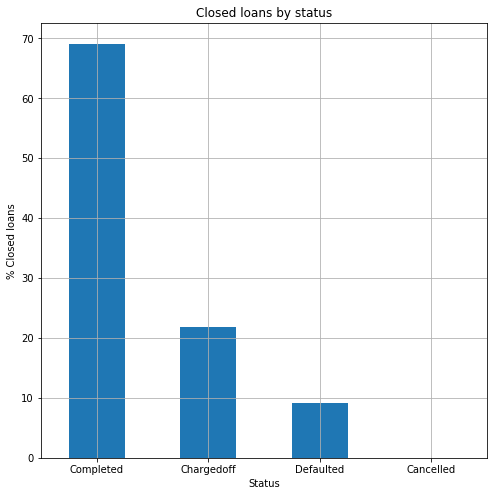

In [6]:
df_closed = df.query('ClosedDate == ClosedDate')
proportion = df_closed.LoanStatus.value_counts()/df_closed.shape[0]*100

proportion.plot('bar', figsize=(8,8))
plt.title('Closed loans by status')
plt.xlabel('Status')
plt.ylabel('% Closed loans')
plt.xticks(rotation=0)
plt.grid();

More than 30% of closed loans are not completely collected and are considered Chargedoff or Defaulted.

Let's move to other variables describing the borrower.

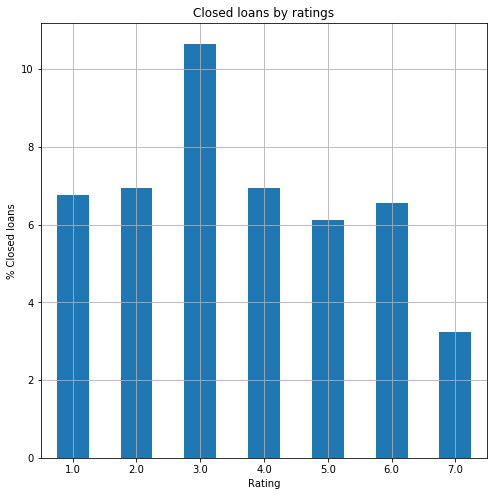

In [7]:
proportion = df_closed.groupby('ProsperRating (numeric)')['ListingKey'].count()/df_closed.shape[0]*100

proportion.plot('bar', figsize=(8,8))
plt.title('Closed loans by ratings')
plt.xlabel('Rating')
plt.ylabel('% Closed loans')
plt.xticks(rotation=0)
plt.grid();

It seems there are some loans with good ratings (5 and above) but most of the loans have a rating below 5. 
But why a loan has a low rating? Let's check why the loans

In [8]:
ids = range(0, 21)
df_category = pd.DataFrame({
    'ListingCategory (numeric)': ids,
    'ListingCategoryName': ['0-Not Available', 
                 '1-Debt Consolidation',
                 '2-Home Improvement',
                 '3-Business',
                 '4-Personal Loan',
                 '5-Student Use',
                 '6-Auto',
                 '7-Other',
                 '8-Baby&Adoption',
                 '9-Boat',
                 '10-Cosmetic Procedure',
                 '11-Engagement Ring',
                 '12-Green Loans',
                 '13-Household Expenses',
                 '14-Large Purchases',
                 '15-Medical/Dental',
                 '16-Motorcycle',
                 '17-RV',
                 '18-Taxes',
                 '19-Vacation',
                 '20-Wedding Loans']
    })
df_closed = df_closed.merge(df_category, how='inner', on='ListingCategory (numeric)')

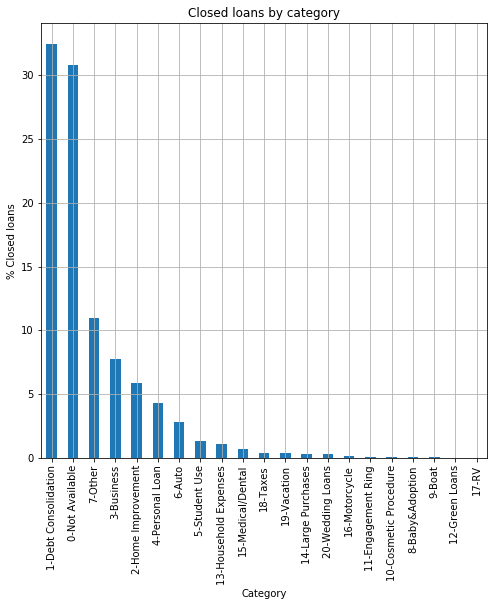

In [9]:
proportion = df_closed['ListingCategoryName'].value_counts()/df_closed.shape[0]*100

proportion.plot('bar', figsize=(8,8))
plt.title('Closed loans by category')
plt.xlabel('Category')
plt.ylabel('% Closed loans')
plt.xticks(rotation=90)
plt.grid();

The most common categories are Debt Consolidation, Not available, Other, Business, Home improvement and Personal Loan.

Let's investigate Loan original amount.

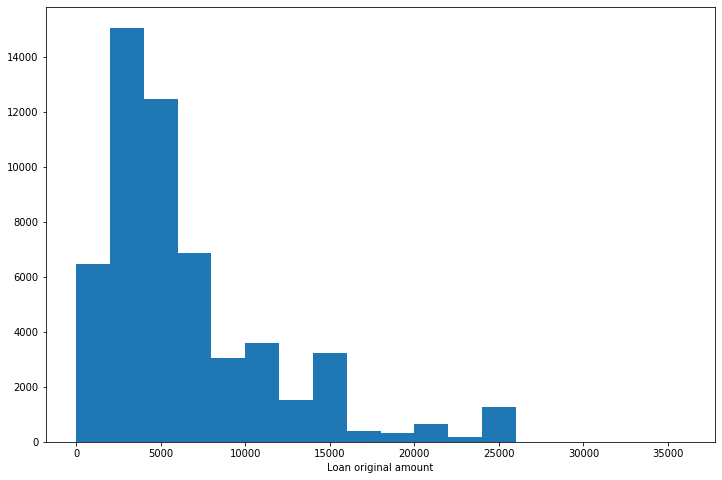

In [46]:
binsize = 2000
max_range = df_closed['LoanOriginalAmount'].max()
bins = np.arange(0, max_range+binsize, binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = df_closed, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan original amount')
plt.show();


Most of loans are low amounts (less than $5,000).

Let's investigate the Borrowers characteristics.

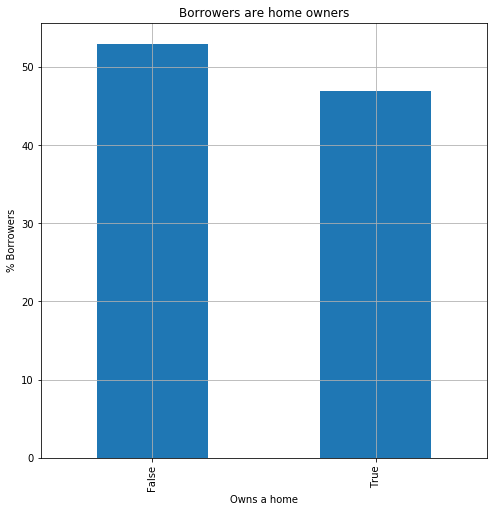

In [10]:
proportion = df_closed.IsBorrowerHomeowner.value_counts()/df_closed.shape[0]*100

proportion.plot('bar', figsize=(8,8))
plt.title('Borrowers are home owners')
plt.xlabel('Owns a home')
plt.ylabel('% Borrowers')
plt.xticks(rotation=90)
plt.grid();

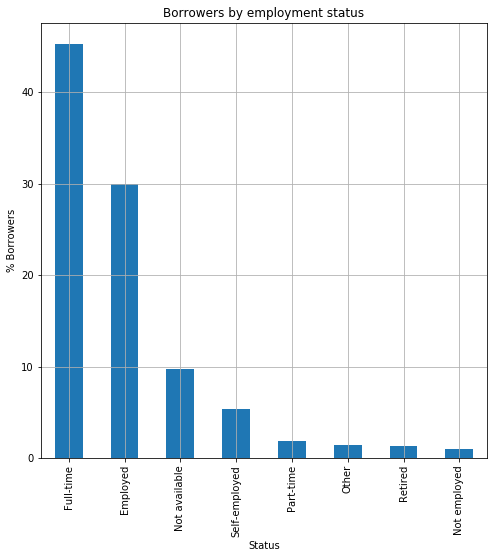

In [11]:
proportion = df_closed.EmploymentStatus.value_counts()/df_closed.shape[0]*100

proportion.plot('bar', figsize=(8,8))
plt.title('Borrowers by employment status')
plt.xlabel('Status')
plt.ylabel('% Borrowers')
plt.xticks(rotation=90)
plt.grid();

Next up let's check the duration of the employment status.

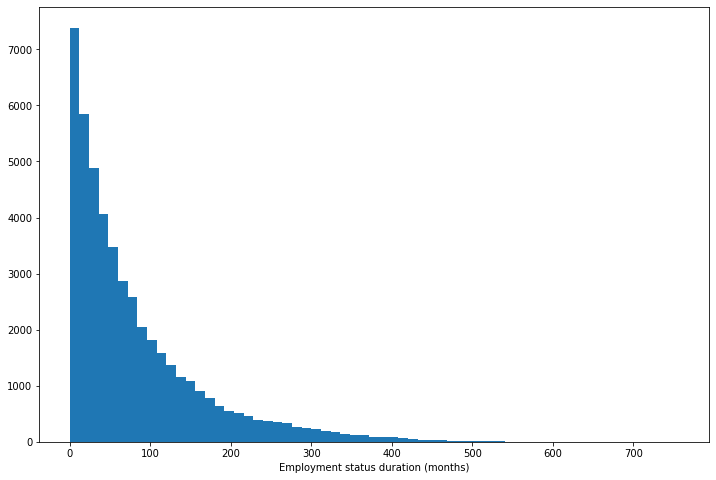

In [12]:
binsize = 12
max_range = df_closed['EmploymentStatusDuration'].max()
bins = np.arange(0, max_range+binsize, binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = df_closed, x = 'EmploymentStatusDuration', bins = bins)
plt.xlabel('Employment status duration (months)')
plt.show();


Most of the borrowers are less than 5 years in their jobs. This variable could influence the Defaulted or Ghargedoff loans. I'll look for a relation in bivariate section.

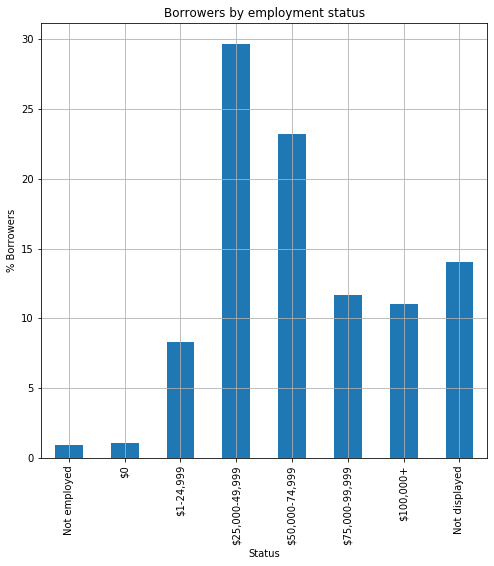

In [13]:
proportion = df_closed.groupby('IncomeRange')['ListingKey'].count()/df_closed.shape[0]*100
new_index = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed']
proportion = proportion.reindex(new_index)

proportion.plot('bar', figsize=(8,8))
plt.title('Borrowers by employment status')
plt.xlabel('Status')
plt.ylabel('% Borrowers')
plt.xticks(rotation=90)
plt.grid();

Althoug there is a high percentage of incomes not displayed, most of the borrowers seem to have medium and high incomes. 
Are these incomes real? Let's check the verifiable income variable.

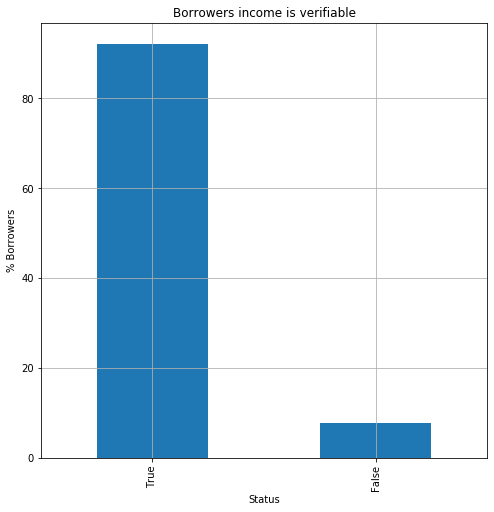

In [14]:
proportion = df_closed.IncomeVerifiable.value_counts()/df_closed.shape[0]*100

proportion.plot('bar', figsize=(8,8))
plt.title('Borrowers income is verifiable')
plt.xlabel('Status')
plt.ylabel('% Borrowers')
plt.xticks(rotation=90)
plt.grid();

Most of the incomes are verified. Let's check the monthly income distribution

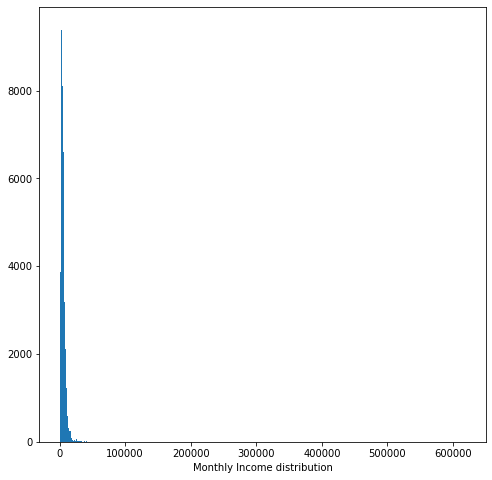

In [15]:
# We try with an standard histogram
binsize = 1000
max_range = df_closed['StatedMonthlyIncome'].max()
bins = np.arange(0, max_range+binsize, binsize)

plt.figure(figsize=[8, 8])
plt.hist(data = df_closed, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Monthly Income distribution')
plt.show();


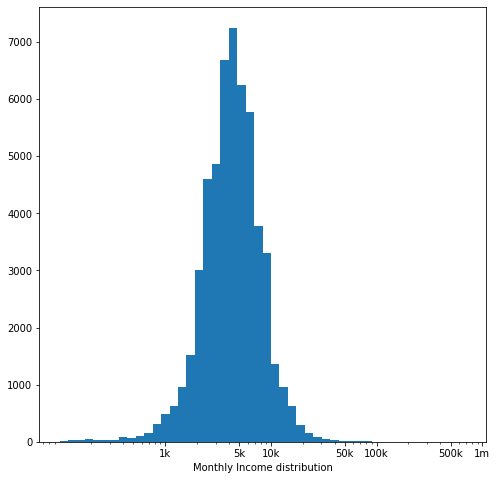

In [16]:
# Let's put it on a log scale
log_binsize = 0.08
bins = 10 ** np.arange(2, np.log10(df_closed['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 8])
plt.hist(data = df_closed, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 5e3, 1e4, 5e4, 1e5, 5e5, 1e6], ['1k', '5k', '10k', '50k', '100k', '500k', '1m'])
plt.xlabel('Monthly Income distribution')
plt.show()

Let's look at the debt to income ratio.

/Users/eduardoburgoa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/eduardoburgoa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


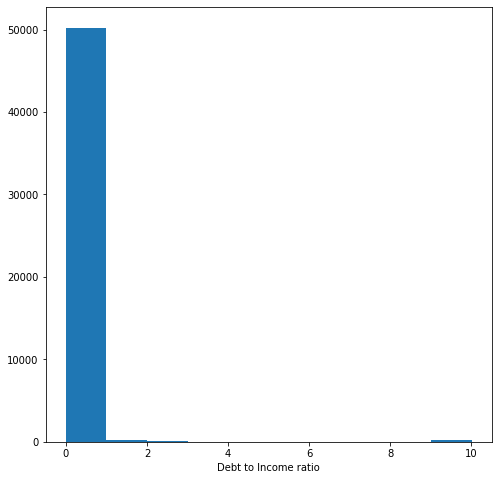

In [17]:
# We try with an standard histogram
plt.figure(figsize=[8, 8])
plt.hist(data = df_closed, x = 'DebtToIncomeRatio')
plt.xlabel('Debt to Income ratio')
plt.show();

Most of the values are between 0 and 1 with some outliers around 10. Let's plot it using log scale.

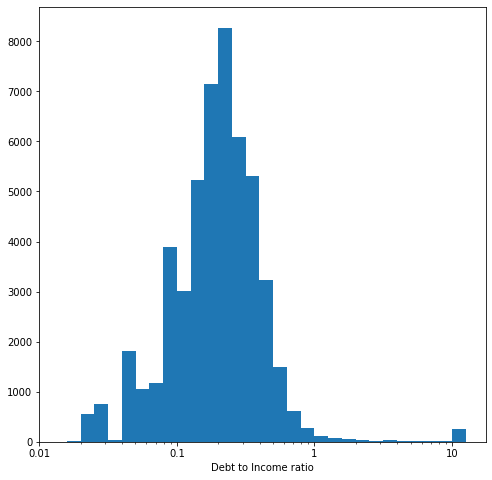

In [18]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(-1.8, np.log10(df_closed['DebtToIncomeRatio'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 8])
plt.hist(data = df_closed, x = 'DebtToIncomeRatio', bins = bins)
plt.xscale('log')
plt.xticks([1e-2, 1e-1, 1e0, 1e1], ['0.01', '0.1', '1', '10'])
plt.xlabel('Debt to Income ratio')
plt.show()

Next up Im going to look for other kind of indicators as credit score. There are two variables describing credit score: lower range and upper range. Plotting them on the same x axis could help understand it better.

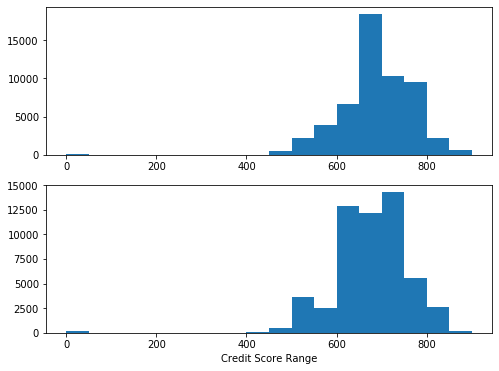

In [19]:
fig, ax = plt.subplots(nrows=2, figsize = [8, 6])

binsize = 50
max_range = df_closed['CreditScoreRangeLower'].max()
bins = np.arange(0, max_range+binsize, binsize)

ax[0].hist(data = df_closed, x = 'CreditScoreRangeUpper', bins = bins)
ax[1].hist(data = df_closed, x = 'CreditScoreRangeLower', bins = bins)

plt.xlabel('Credit Score Range')
plt.show();

There is only a small group with a Credit score rating near 0. Lets check other variables.

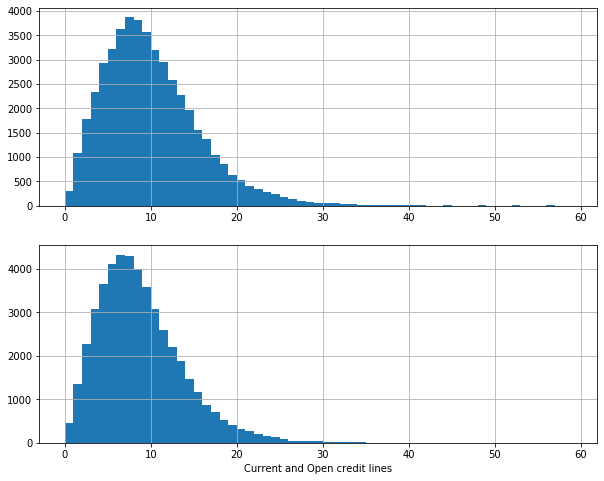

In [20]:
fig, ax = plt.subplots(nrows=2, figsize = [10, 8])

# We try with an standard histogram
binsize = 1
max_range = df_closed['CurrentCreditLines'].max()
bins = np.arange(0, max_range+binsize, binsize)

ax[0].hist(data = df_closed, x = 'CurrentCreditLines', bins = bins)
ax[0].grid()

ax[1].hist(data = df_closed, x = 'OpenCreditLines', bins = bins)

plt.xlabel('Current and Open credit lines')
ax[1].grid()
plt.show();

Both distributions are rightly skewed with a median of 8 credit lines. 

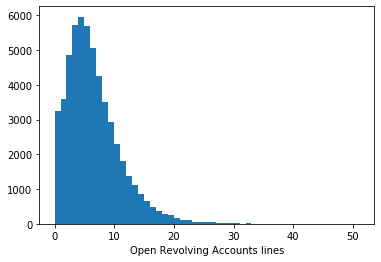

In [21]:

# We try with an standard histogram
binsize = 1
max_range = df_closed['OpenRevolvingAccounts'].max()
bins = np.arange(0, max_range+binsize, binsize)

plt.hist(data = df_closed, x = 'OpenRevolvingAccounts', bins = bins)

plt.xlabel('Open Revolving Accounts lines')
plt.show();

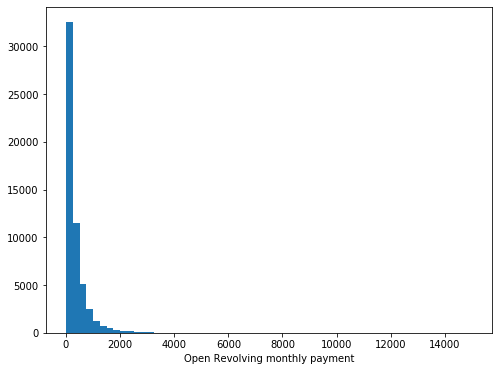

In [22]:
# We try with an standard histogram
binsize = 250
max_range = df_closed['OpenRevolvingMonthlyPayment'].max()
bins = np.arange(0, max_range+binsize, binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df_closed, x = 'OpenRevolvingMonthlyPayment', bins = bins)

plt.xlabel('Open Revolving monthly payment')
plt.show();

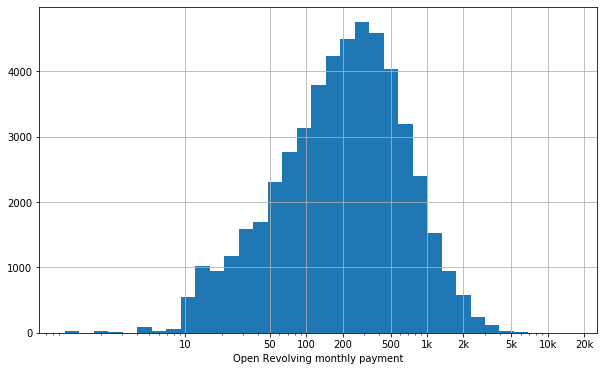

In [23]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.12
bins = 10 ** np.arange(0, np.log10(df_closed['OpenRevolvingMonthlyPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_closed, x = 'OpenRevolvingMonthlyPayment', bins = bins)
plt.xscale('log')
plt.xticks([1e1, 5e1, 1e2, 2e2, 5e2, 1e3, 2e3, 5e3, 1e4, 2e4], ['10', '50', '100', '200', '500', '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Open Revolving monthly payment')
plt.grid()
plt.show()

The distribution includes high revolving payments. Could this lead to loan deliquency?
Let's check the balance.

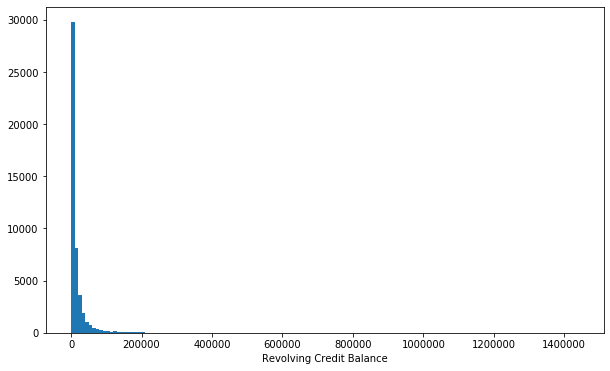

In [24]:
binsize = 10000
max_range = df_closed['RevolvingCreditBalance'].max()
bins = np.arange(0, max_range+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_closed, x = 'RevolvingCreditBalance', bins = bins)

plt.xlabel('Revolving Credit Balance')
plt.show();

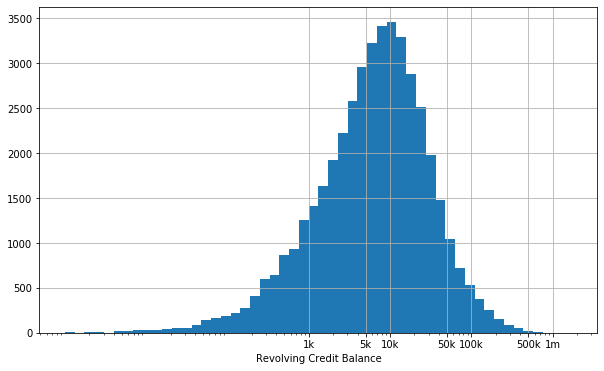

In [25]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.12
bins = 10 ** np.arange(0, np.log10(df_closed['RevolvingCreditBalance'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_closed, x = 'RevolvingCreditBalance', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 5e3, 1e4, 5e4, 1e5, 5e5, 1e6], ['1k', '5k', '10k', '50k', '100k', '500k', '1m'])
plt.xlabel('Revolving Credit Balance')
plt.grid()
plt.show()

The distribution is almost log-normal with the center in $10k. 

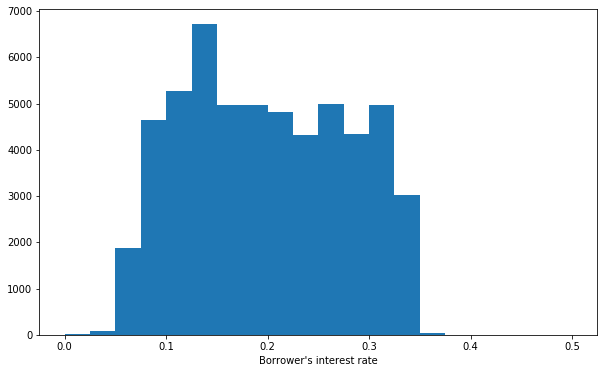

In [59]:
binsize = 0.025
max_range = df_closed['BorrowerRate'].max()
bins = np.arange(0, max_range+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_closed, x = 'BorrowerRate', bins = bins)

plt.xlabel("Borrower's interest rate")
plt.show();

The distribution is slightly right skewed with the center in 0.2. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were some variables as `StatedMonthlyIncome` and `DebtToIncomeRatio` which took on a large range of values, so I looked at the data using log transforms.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

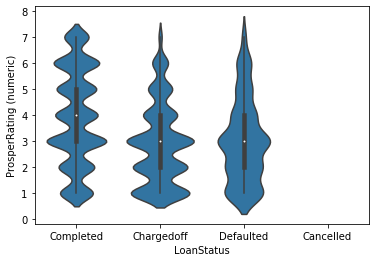

In [26]:
base_color = sb.color_palette()[0]

sb.violinplot(data=df_closed, x='LoanStatus', y='ProsperRating (numeric)', color=base_color);

Defaulted and Chargedoff loans have a lower median ratings than completed loans. Therefore there seems to be a direct relation between ratings and the probaibility of completing the payment of a loan.

Let's analyze relation of loan status and loan amount.


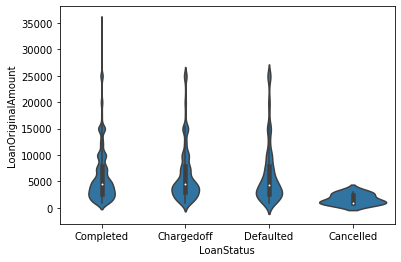

In [47]:
base_color = sb.color_palette()[0]

sb.violinplot(data=df_closed, x='LoanStatus', y='LoanOriginalAmount', color=base_color);

Completed has a wider distribution but there is not other relation between loan status and loan relation.

We need to look for other relations connecting the borrowers characteristics and the loan status.

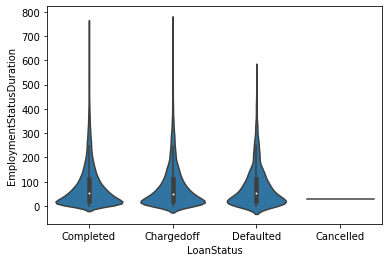

In [27]:
sb.violinplot(data=df_closed, x='LoanStatus', y='EmploymentStatusDuration', color=base_color);

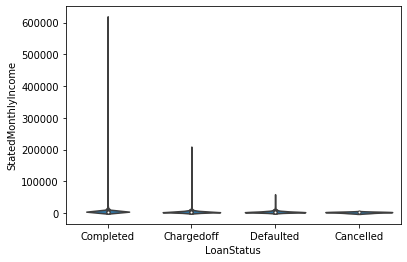

In [28]:
sb.violinplot(data=df_closed, x='LoanStatus', y='StatedMonthlyIncome', color=base_color);

We cannot see the distribution because the outliers. Let's remove the outliers.

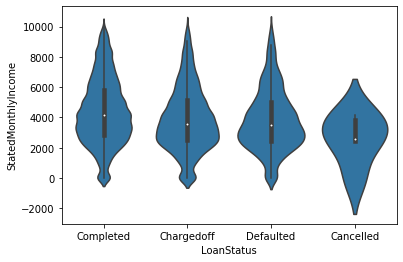

In [29]:
sb.violinplot(data=df_closed.query('StatedMonthlyIncome < 10000'), x='LoanStatus', y='StatedMonthlyIncome', color=base_color);

Median income is lower in unpaid loans.

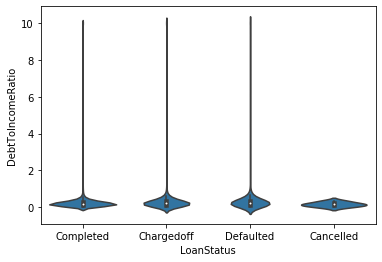

In [30]:
sb.violinplot(data=df_closed, x='LoanStatus', y='DebtToIncomeRatio', color=base_color);

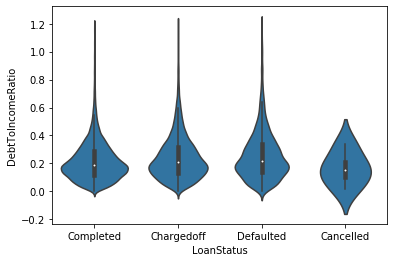

In [31]:
sb.violinplot(data=df_closed.query('DebtToIncomeRatio < 1.2'), x='LoanStatus', y='DebtToIncomeRatio', color=base_color);

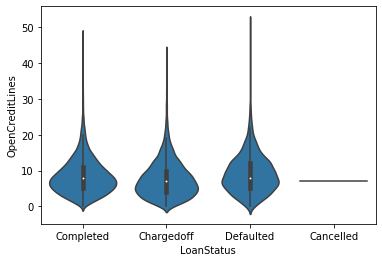

In [32]:
sb.violinplot(data=df_closed, x='LoanStatus', y='OpenCreditLines', color=base_color);

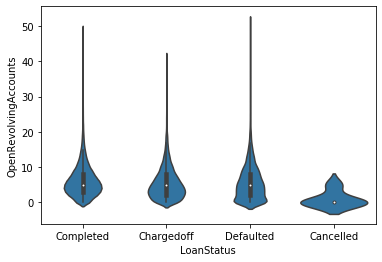

In [38]:
sb.violinplot(data=df_closed, x='LoanStatus', y='OpenRevolvingAccounts', color=base_color);

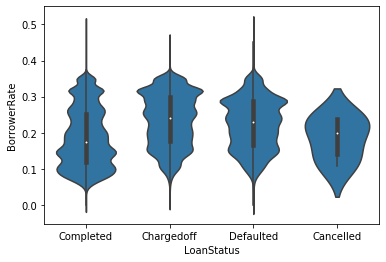

In [62]:
sb.violinplot(data=df_closed, x='LoanStatus', y='BorrowerRate', color=base_color);

There is a clear relation between borrower interest rate and loan status.

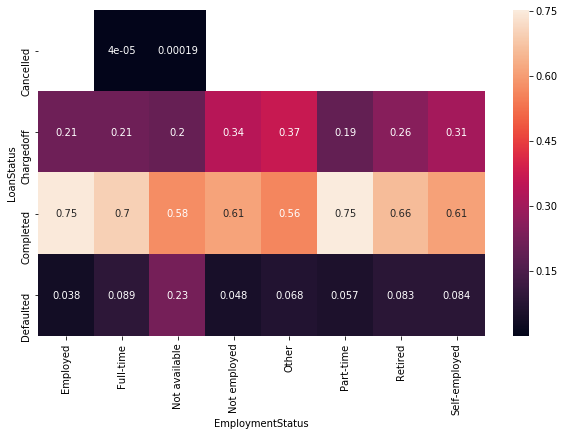

In [33]:
emp_totals = df_closed.groupby('EmploymentStatus')['ListingKey'].count()
proportion = (df_closed.groupby(['LoanStatus', 'EmploymentStatus'])['ListingKey'].count()/emp_totals).unstack()

plt.figure(figsize=[10, 6])
sb.heatmap(data=proportion, annot=True);


- Lowest Completed loan proportion ocurrs in Employment Status `Other`, second is `Not available`.
- Highest Completed loan proportion ocurrs in Employment Status `Employed`.
- Defaulted loan proportion is greater for Employment Status `Not available`.
- Chargedoff loan proportion is greater for Employment Status `Other` and `Not employed`.


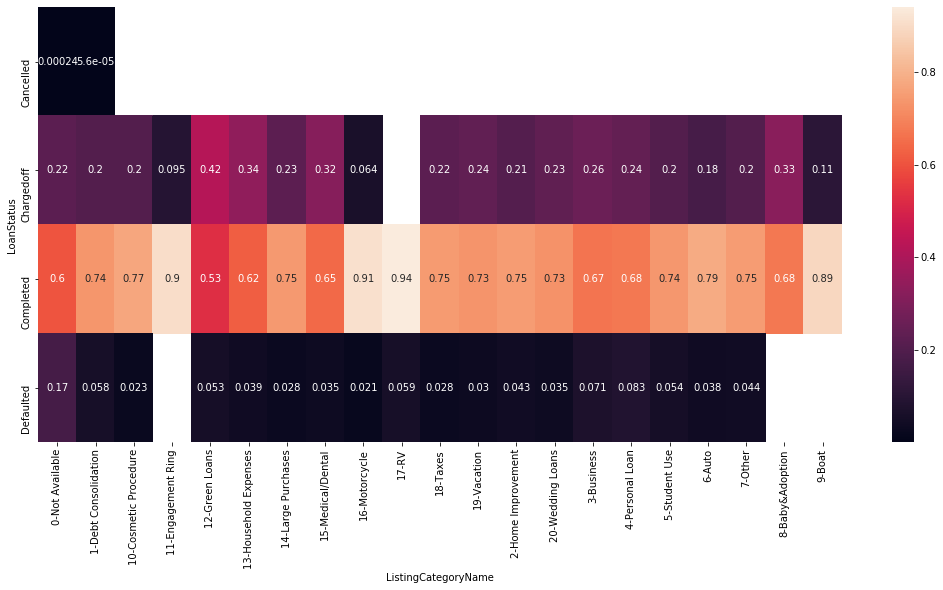

In [37]:
listing_totals = df_closed.groupby('ListingCategoryName')['ListingKey'].count()
proportion = (df_closed.groupby(['LoanStatus', 'ListingCategoryName'])['ListingKey'].count()/listing_totals).unstack()

plt.figure(figsize=[18, 8])
sb.heatmap(data=proportion, annot=True);

- Lowest Completed loan proportion ocurrs in Listing Category `Green Loans`.
- Highest Completed loan proportion ocurrs in Listing Category `RV`.
- Greatest Defaulted loan proportion ocurrs in Listing Category `Not available`.
- Greatest Chargedoff loan proportion ocurrs for Listing Category `Green Loans`, `Household Expenses`, `Baby & Adoption` and `Medical/Dental`.

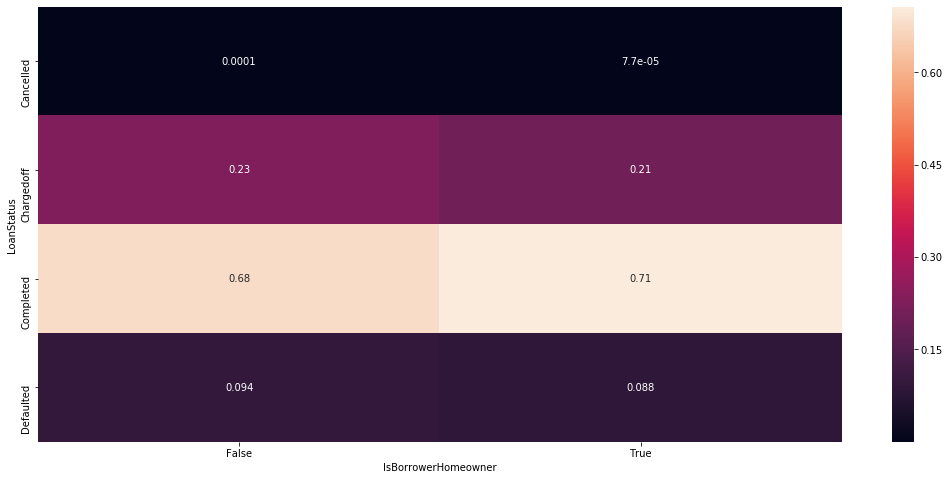

In [39]:
listing_totals = df_closed.groupby('IsBorrowerHomeowner')['ListingKey'].count()
proportion = (df_closed.groupby(['LoanStatus', 'IsBorrowerHomeowner'])['ListingKey'].count()/listing_totals).unstack()

plt.figure(figsize=[18, 8])
sb.heatmap(data=proportion, annot=True);

Being Owner of a house and Loan status does not seem not related.

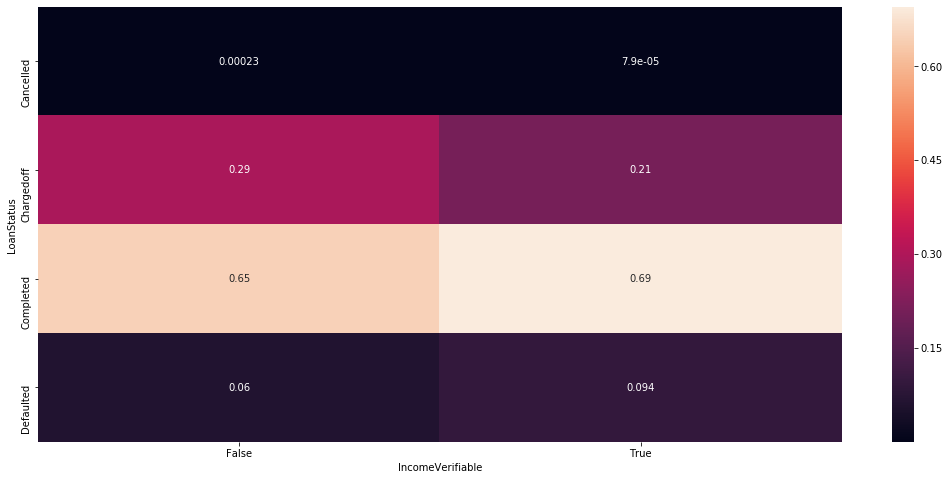

In [48]:
listing_totals = df_closed.groupby('IncomeVerifiable')['ListingKey'].count()
proportion = (df_closed.groupby(['LoanStatus', 'IncomeVerifiable'])['ListingKey'].count()/listing_totals).unstack()

plt.figure(figsize=[18, 8])
sb.heatmap(data=proportion, annot=True);

Verifiable income and Loan status does not seem not related.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

`LoanStatus` has relation with:

- `ProsperRating`
- `ListingCategory`
- `BorrowerRate`
- `EmploymentStatus`



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!